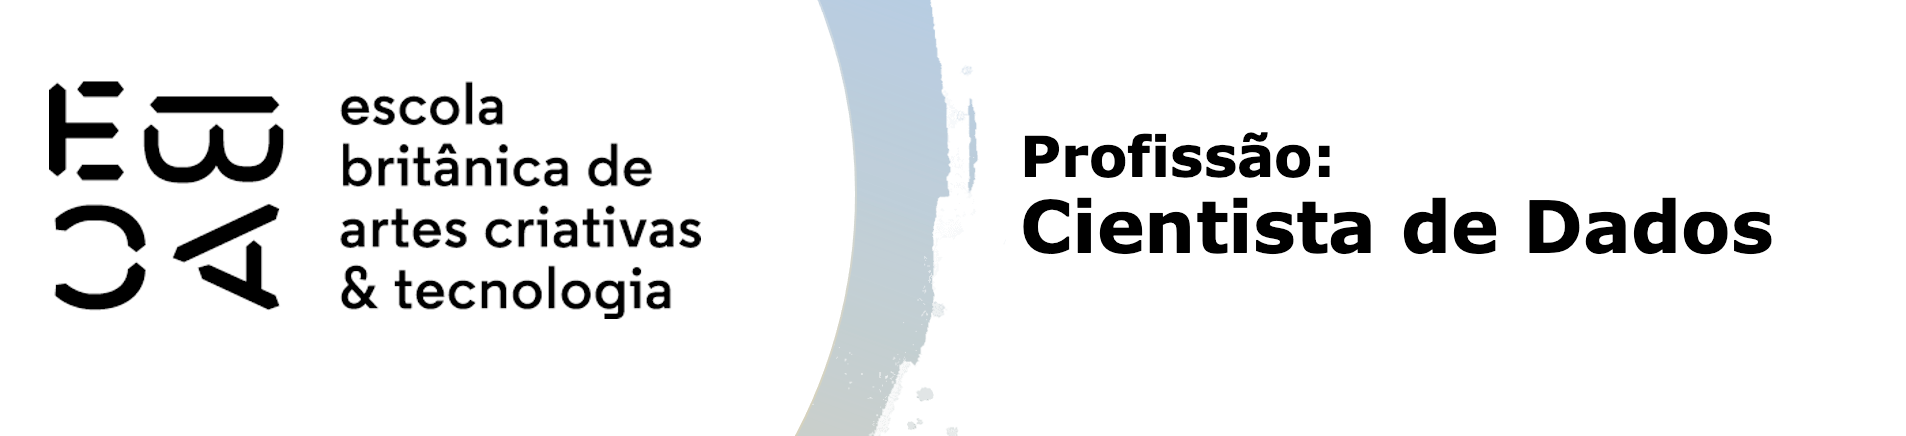

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [61]:
cs = pd.read_feather('credit_scoring.ftr')
cs.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
cs.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [4]:
cs.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [5]:
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [6]:
print('número de linhas: {0}'.format(cs.shape[0]))
date.value_counts()

número de linhas: 750000


oot       
2016-01-01    1
2016-02-01    1
2016-03-01    1
dtype: int64

In [7]:
cs.data_ref.value_counts()

2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

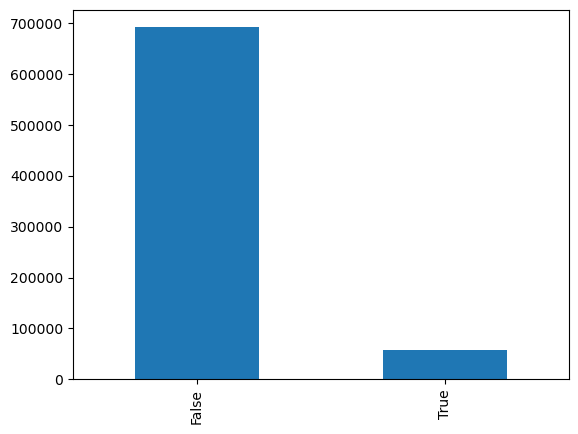

In [8]:
var = 'mau'
grafico_barras = cs[var].value_counts().plot.bar()

In [9]:
cs.sexo.value_counts()

F    504580
M    245420
Name: sexo, dtype: int64

<Figure size 640x480 with 0 Axes>

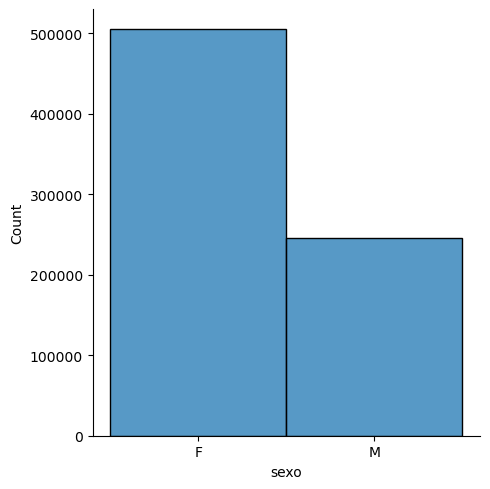

In [10]:
plt.clf()
var = "sexo"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [11]:
cs.posse_de_veiculo.value_counts()

N    457954
S    292046
Name: posse_de_veiculo, dtype: int64

<Figure size 640x480 with 0 Axes>

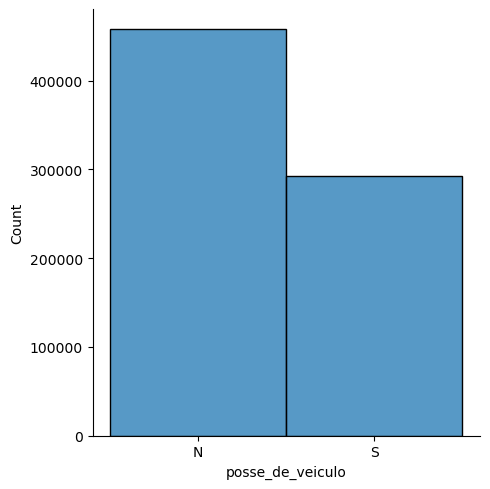

In [12]:
plt.clf()
var = "posse_de_veiculo"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [13]:
cs.posse_de_imovel.value_counts()

S    503692
N    246308
Name: posse_de_imovel, dtype: int64

<Figure size 640x480 with 0 Axes>

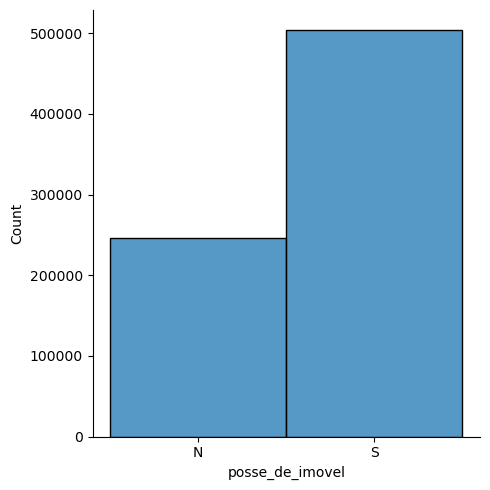

In [14]:
plt.clf()
var = "posse_de_imovel"
sns.displot(cs, x = var, bins = 50)
plt.show()

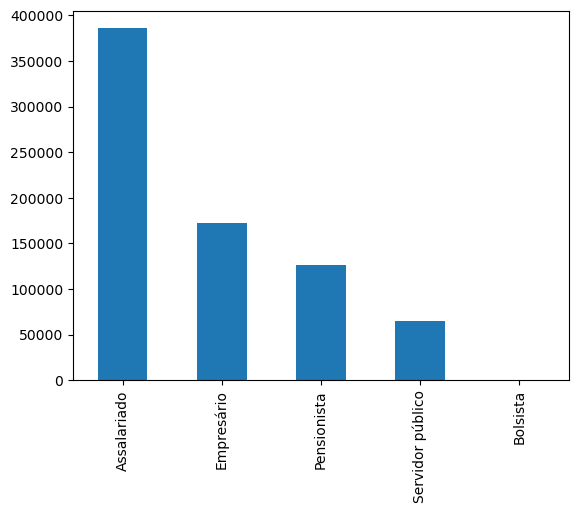

In [15]:
var = 'tipo_renda'
grafico_barras = cs[var].value_counts().plot.bar()

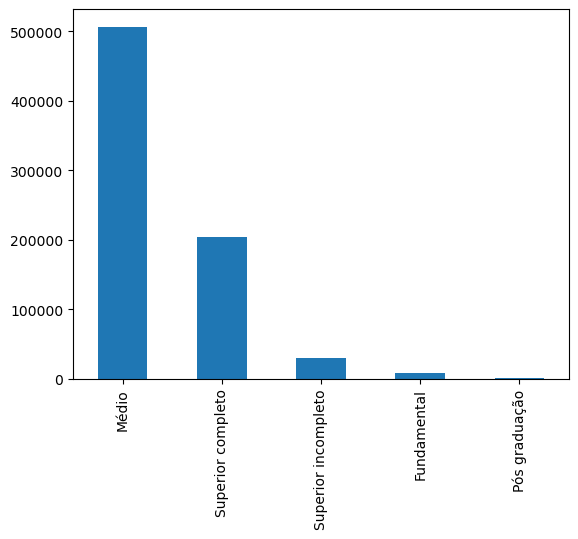

In [16]:
var = 'educacao'
grafico_barras = cs[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

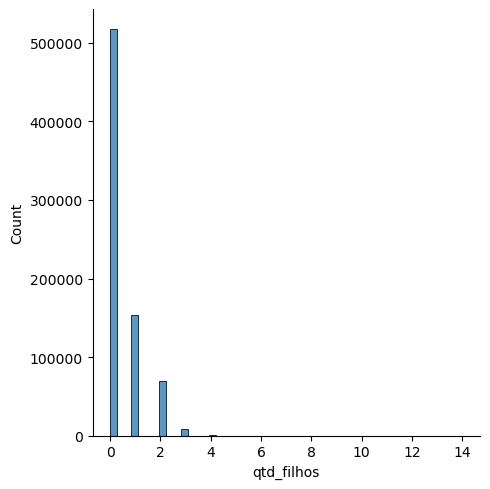

In [17]:
plt.clf()
var = "qtd_filhos"
sns.displot(cs, x = var, bins = 50)
plt.show()

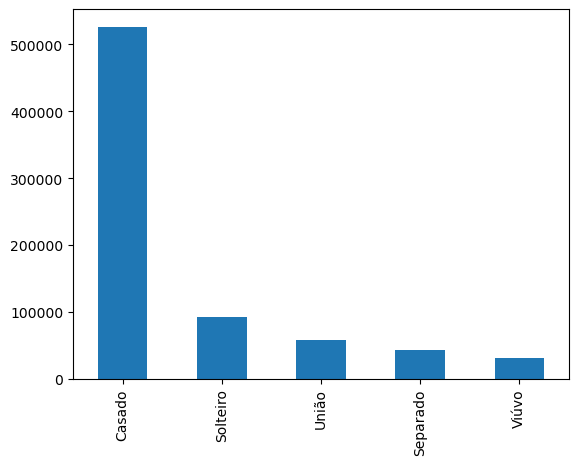

In [18]:
var = 'estado_civil'
grafico_barras = cs[var].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

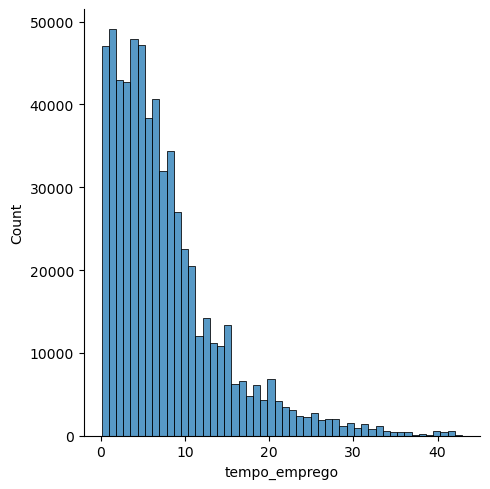

In [19]:
plt.clf()
var = "tempo_emprego"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

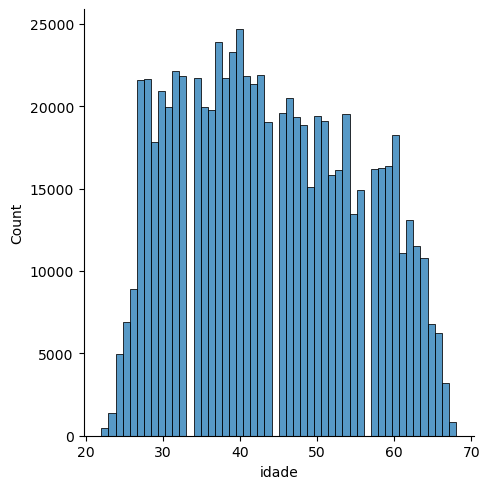

In [20]:
plt.clf()
var = "idade"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 640x480 with 0 Axes>

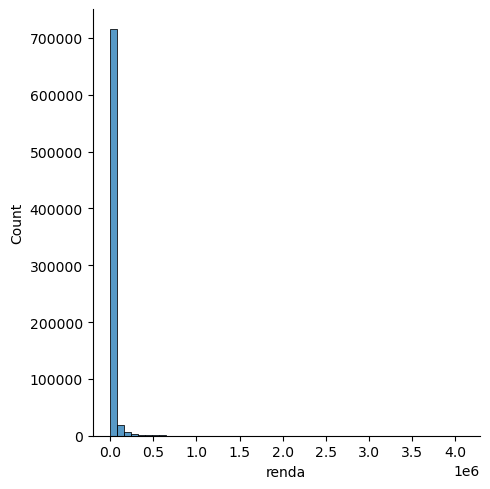

In [21]:
plt.clf()
var = "renda"
sns.displot(cs, x = var, bins = 50)
plt.show()

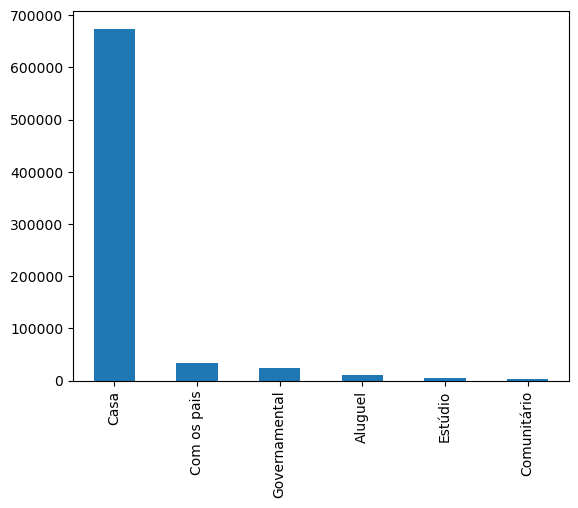

In [22]:
var = 'tipo_residencia'
grafico_barras = cs[var].value_counts().plot.bar()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

<AxesSubplot:xlabel='sexo', ylabel='mau'>

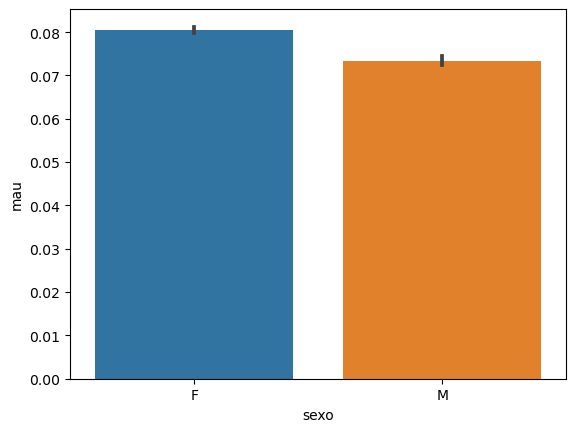

In [23]:
sns.barplot(x='sexo', y = 'mau', data=cs)

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='mau'>

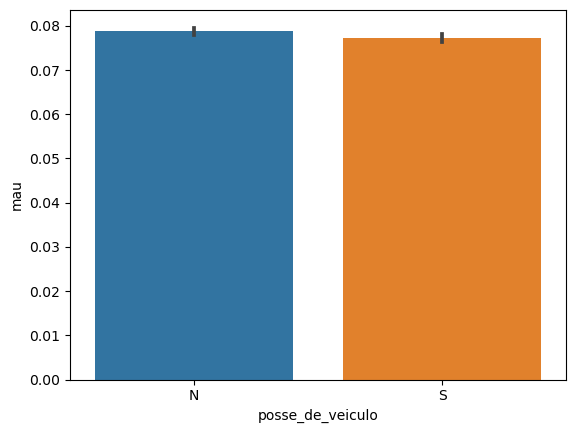

In [24]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=cs)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='mau'>

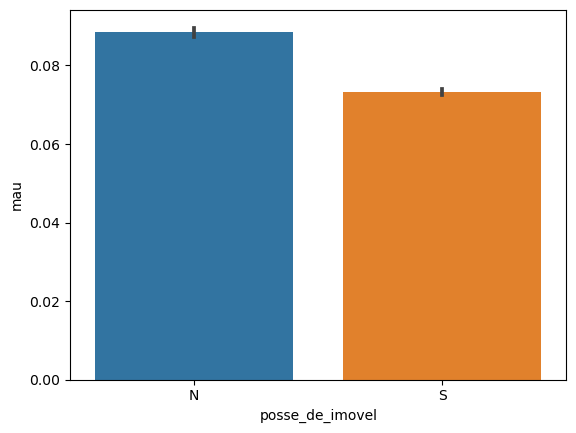

In [25]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=cs)

<AxesSubplot:xlabel='tipo_renda', ylabel='mau'>

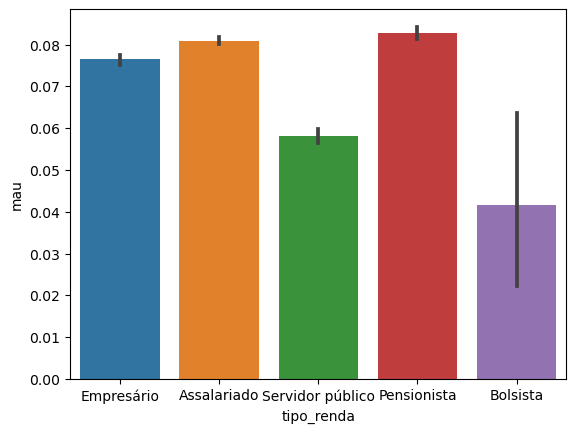

In [26]:
sns.barplot(x='tipo_renda', y = 'mau', data=cs)

<AxesSubplot:xlabel='estado_civil', ylabel='mau'>

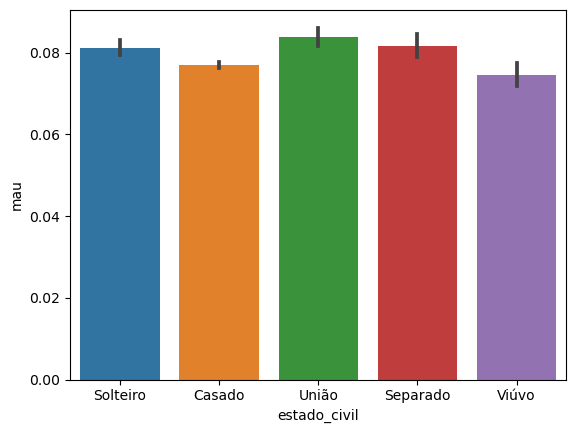

In [27]:
sns.barplot(x='estado_civil', y = 'mau', data=cs)

In [28]:
pd.crosstab(cs['mau'], cs['qtd_filhos'])

qtd_filhos,0,1,2,3,4,5,7,14
mau,,,,,,,,
False,477683,140345,64142,7951,999,81,83,73
True,39648,12676,5490,718,66,14,18,13


In [29]:
pd.crosstab(cs['mau'], cs['educacao'])

educacao,Fundamental,Médio,Pós graduação,Superior completo,Superior incompleto
mau,,,,,
False,7789,466106,753,189684,27025
True,786,40730,59,14622,2446


In [30]:
pd.crosstab(cs['mau'], cs['tipo_residencia'])

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
mau,,,,,,
False,9416,622288,30086,3012,5042,21513
True,933,52006,3146,278,353,1927


In [31]:
pd.crosstab(cs['mau'], cs['idade'])

idade,22,23,24,25,26,27,28,29,30,31,...,59,60,61,62,63,64,65,66,67,68
mau,,,,,,,,,,,,,,,,,,,,,
False,454,1232,4331,6159,7954,19269,19567,16208,18956,18169,...,15182,17008,10174,12117,10536,9913,6229,5774,2971,779
True,41,170,618,752,937,2330,2079,1592,1970,1762,...,1166,1267,916,968,974,888,563,448,228,76


In [32]:
pd.crosstab(cs['mau'], cs['renda'])

renda,107.67,109.21,113.36,117.12,118.69,123.09,123.69,127.04,128.86,131.52,...,2993543.70,2995195.62,3019480.45,3049630.03,3155338.28,3293424.46,3307351.54,3607412.81,3728517.03,4083986.22
mau,,,,,,,,,,,,,,,,,,,,,
False,0,0,2,2,0,0,0,1,2,4,...,4,2,7,1,3,6,3,5,5,2
True,3,4,2,2,2,2,2,4,3,1,...,0,0,0,0,0,0,0,0,0,0


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [33]:
cs.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [34]:
cs['tempo_emprego'].fillna(cs['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [35]:
metadados = pd.DataFrame(cs.dtypes, columns=['dtype'])
metadados['valores_unicos'] = cs.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [36]:
cs['mau'] = cs.mau.astype('int64')

In [37]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [38]:
iv_sexo = IV(cs.sexo, cs.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [39]:
metadados = pd.DataFrame(cs.dtypes, columns=['dtype'])
metadados['valores_unicos'] = cs.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau','papel'] = 'resposta'
metadados.loc['bom','papel'] = 'resposta'
metadados

,dtype,valores_unicos,papel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [40]:
var='idade'
IV(pd.qcut(cs[var],5,duplicates='drop'), cs.mau)

0.01796842289500074

In [41]:
for var in metadados[metadados.papel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(cs[var],5,duplicates='drop'), cs.mau)
    else:
        metadados.loc[var, 'IV'] = IV(cs[var], cs.mau)
        
        
metadados

,dtype,valores_unicos,papel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [42]:
def biv_discreta(var, cs):
    cs['bom'] = 1-cs.mau
    g = cs.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = cs.mau.mean()
    woe_geral = np.log(cs.mau.mean() / (1 - cs.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

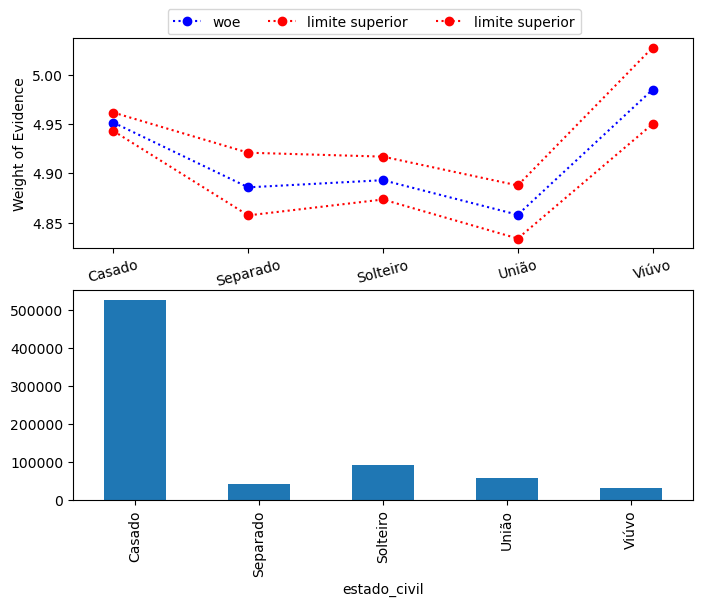

In [43]:
biv_discreta('estado_civil', cs);

,qt_bom,qt_mau,mau,tipo_renda,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
tipo_renda,,,,,,,,,,,,,,
Assalariado,354527,354527,0.919083,Assalariado,385740,0.000439,0.919943,0.918222,2.429950,2.441578,2.420306,4.897138,4.908766,4.887495
Bols./SerPubl,61497,61497,0.942006,Bols./SerPubl,65283,0.000915,0.943799,0.940213,2.787678,2.820985,2.759132,5.254866,5.288173,5.226320
Empresário,159508,159508,0.923549,Empresário,172712,0.000639,0.924802,0.922296,2.491574,2.509458,2.476671,4.958762,4.976646,4.943859
Pensionista,115825,115825,0.917317,Pensionista,126265,0.000775,0.918836,0.915798,2.406436,2.426634,2.389885,4.873624,4.893822,4.857073


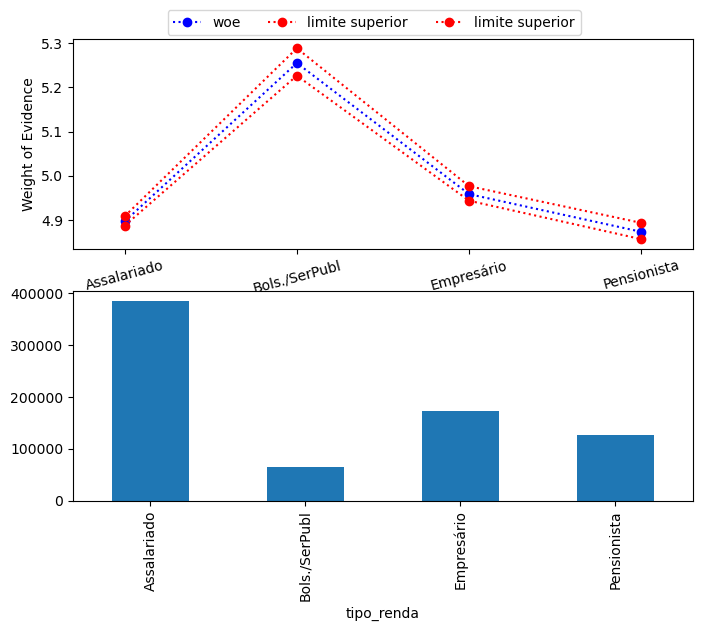

In [44]:
cs2 = cs.copy()
cs2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', cs2)

In [45]:
IV(cs2.tipo_renda, cs.mau)

0.009314630323182816

,qt_bom,qt_mau,mau,educacao,cont,ep,mau_sup,mau_inf,logit,logit_sup,logit_inf,woe,woe_sup,woe_inf
educacao,,,,,,,,,,,,,,
Fundamental,7789,7789,0.908338,Fundamental,8575,0.003116,0.914446,0.902230,2.293511,2.369175,2.235701,4.760699,4.836363,4.702889
Médio,466106,466106,0.919639,Médio,506836,0.000382,0.920387,0.918890,2.437448,2.447619,2.428992,4.904636,4.914807,4.896180
Sup.Compl/PosGra,190437,190437,0.928427,Sup.Compl/PosGra,205118,0.000569,0.929542,0.927311,2.562767,2.579677,2.548502,5.029955,5.046865,5.015690
Superior incompleto,27025,27025,0.917003,Superior incompleto,29471,0.001607,0.920153,0.913853,2.402308,2.444427,2.368489,4.869496,4.911615,4.835677


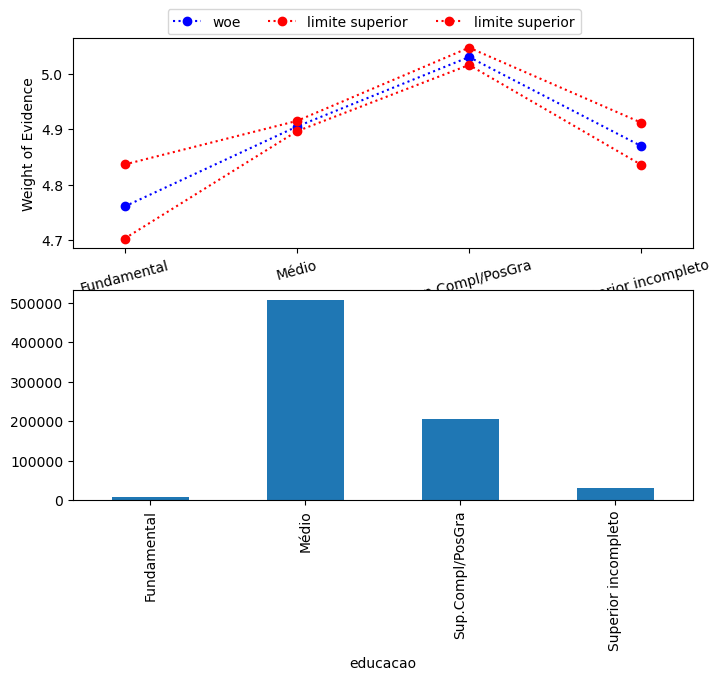

In [46]:
cs2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', cs2)

0.0023941390471014087

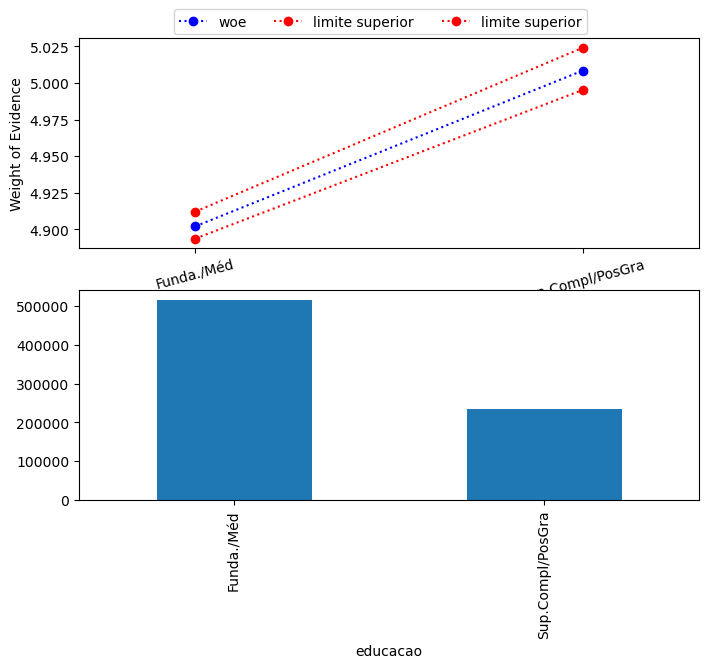

In [47]:
cs2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra', 
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', cs2)
IV(cs2.educacao, cs.mau)

## Avaliação do modelo

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [48]:
pd.crosstab(cs['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

In [51]:
from pycaret.classification import *

In [52]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)


In [53]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [54]:
X_digits.shape

(1797, 64)

In [55]:
X_train.shape

(1257, 64)

In [64]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [65]:
pca.fit(X_train)
X_train =  pca.transform(X_train)

In [66]:
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [69]:
X_test = scaler.transform(X_test)

In [70]:
X_test = pca.transform(X_test)

In [71]:
logistic.predict(X_test)

array([4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 9, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 9, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 7, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 9, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)


In [119]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

In [75]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [76]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [77]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [78]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [79]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [80]:
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('logistic', LogisticRegression(max_iter=200))]

In [81]:
pipe[0]

StandardScaler()

In [82]:
pipe[1]

PCA(n_components=15)

In [83]:
pipe[2]

LogisticRegression(max_iter=200)

In [84]:
pipe[1].transform(X_train)

array([[  0.8709917 , -12.61622141, -18.95622104, ...,   5.23477813,
         16.04797547,   3.86884347],
       [  7.38999986,  -7.84635173, -16.4907025 , ...,   8.54303704,
         19.95700318,   2.72002623],
       [  8.28998206, -10.02870361, -14.17156911, ...,   9.14180379,
         27.34356609,   4.06906072],
       ...,
       [-12.90637877, -12.77056955,  16.69160317, ...,   1.52853613,
         10.37486679,   6.69194066],
       [-12.20193837,  -2.58789858,   7.00752004, ...,   8.78276666,
         10.01344682,   2.86649986],
       [-11.21461682,   2.61268496,   2.68279828, ...,   4.0174769 ,
         18.71763796,  -4.74653895]])

In [85]:
pca_pipe.transform(X_train)

array([[  0.8709917 , -12.61622141, -18.95622104, ...,   5.23477813,
         16.04797547,   3.86884347],
       [  7.38999986,  -7.84635173, -16.4907025 , ...,   8.54303704,
         19.95700318,   2.72002623],
       [  8.28998206, -10.02870361, -14.17156911, ...,   9.14180379,
         27.34356609,   4.06906072],
       ...,
       [-12.90637877, -12.77056955,  16.69160317, ...,   1.52853613,
         10.37486679,   6.69194066],
       [-12.20193837,  -2.58789858,   7.00752004, ...,   8.78276666,
         10.01344682,   2.86649986],
       [-11.21461682,   2.61268496,   2.68279828, ...,   4.0174769 ,
         18.71763796,  -4.74653895]])

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [62]:
dummy = pd.get_dummies(cs, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [63]:
dummy

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_F,sexo_M,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,5733,0,43,6.873973,1.0,2515.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
1,2015-01-01,727,0,35,4.526027,2.0,3180.19,False,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,6374,2,31,0.243836,4.0,1582.29,False,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,9566,0,54,12.772603,2.0,13721.17,False,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,9502,0,31,8.432877,1.0,2891.08,False,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,0,48,3.038356,2.0,2109.99,False,0,1,...,0,0,0,0,0,1,0,0,0,0
749996,2016-03-01,7000,0,65,NaN,1.0,1389.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
749997,2016-03-01,14023,2,43,10.375342,4.0,649.06,True,0,1,...,0,0,0,0,0,1,0,0,0,0
749998,2016-03-01,2396,0,56,13.780822,1.0,4216.72,True,1,0,...,0,0,0,1,0,1,0,0,0,0


### Treinar um modelo de regressão logistica com o resultado

In [120]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9219,0.7790,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9219,0.7747,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9219,0.7440,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9219,0.7623,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9219,0.7592,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9222,0.7527,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9222,0.7316,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9222,0.7428,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9219,0.7689,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [121]:
tuned_lr = tune_model(lr, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5610,0.7771,0.8640,0.1361,0.2351,0.1158,0.2143
1,0.5696,0.7688,0.8493,0.1368,0.2356,0.1168,0.2122
2,0.5650,0.7527,0.8493,0.1355,0.2337,0.1144,0.2095
3,0.5573,0.7607,0.8603,0.1346,0.2328,0.1131,0.2103
4,0.5676,0.7493,0.8125,0.1319,0.2269,0.1069,0.1930
5,0.5523,0.7464,0.8229,0.1286,0.2224,0.1015,0.1888
6,0.5500,0.7508,0.8229,0.1280,0.2216,0.1004,0.1874
7,0.5626,0.7513,0.8229,0.1313,0.2265,0.1066,0.1948
8,0.5586,0.7768,0.8676,0.1359,0.2349,0.1155,0.2147


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


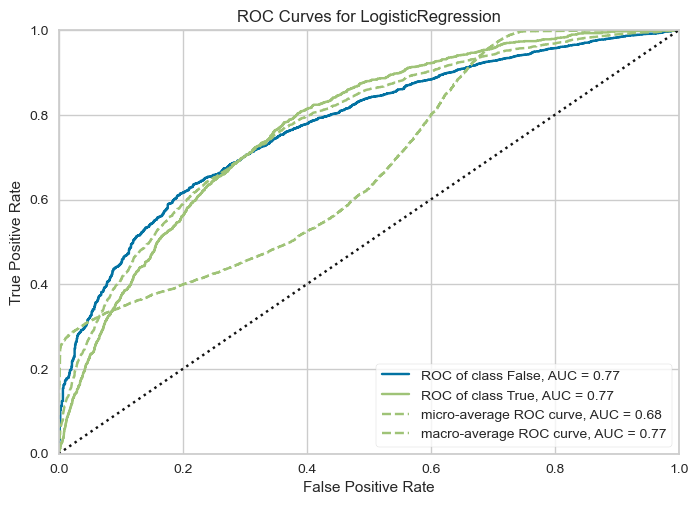

In [122]:
plot_model(tuned_lr, plot = 'auc')

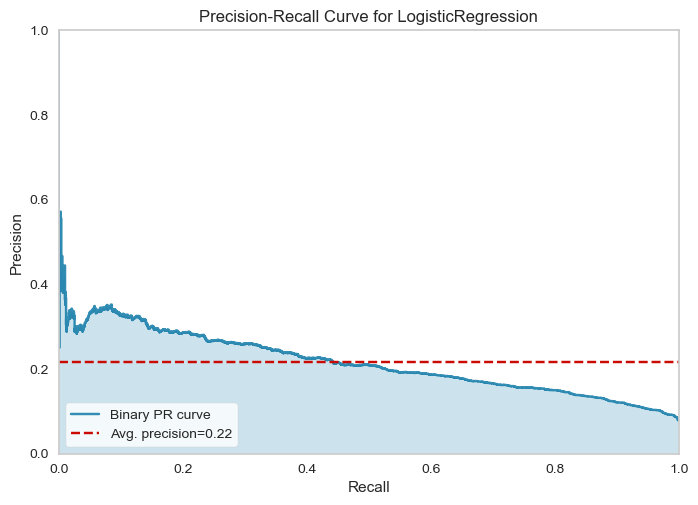

In [123]:
plot_model(tuned_lr, plot = 'pr')

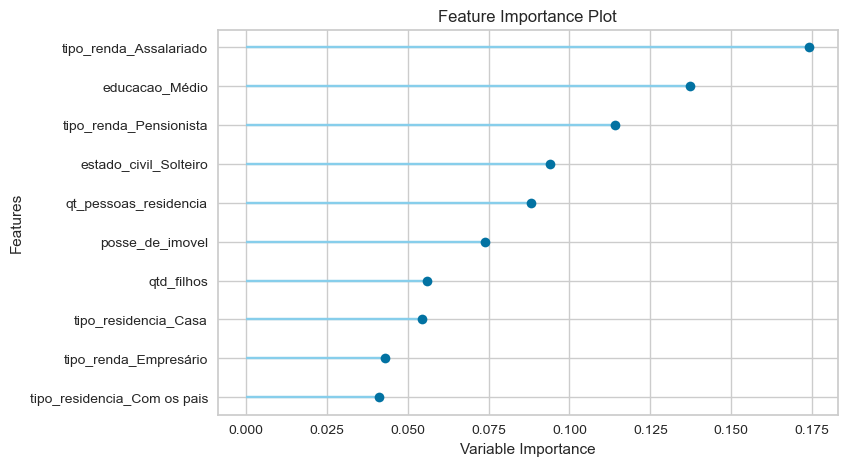

In [124]:
plot_model(tuned_lr, plot = 'feature')

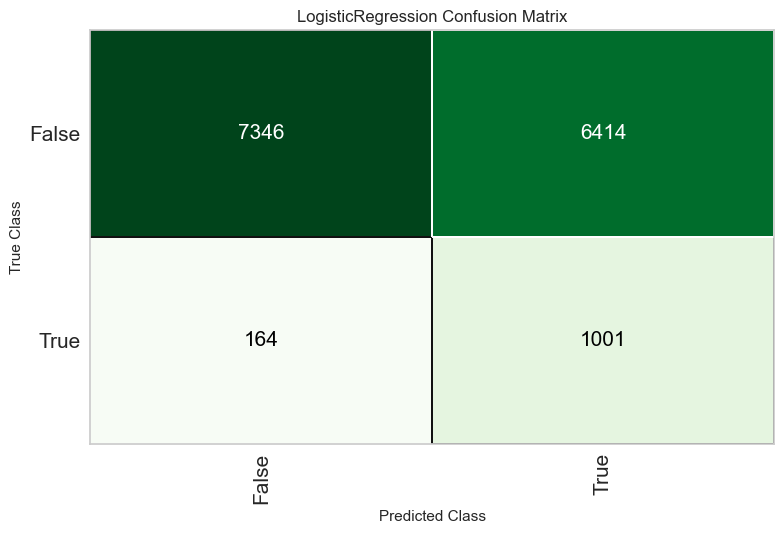

In [125]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [126]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [127]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5593,0.7735,0.8592,0.1350,0.2333,0.1138,0.2109


In [129]:
final_lr = finalize_model(tuned_lr)

In [130]:
print(final_lr)

Pipeline(memory=Memory(location=C:\Users\WORKST~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categorical_...
                                                              handle_unknown='value',
                                

### Salvar o pickle file do modelo treinado

In [132]:
import pickle

nome_arquivo = 'model_final.pkl'
pickle.dump(final_lr, open(nome_arquivo, 'wb'))

# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [86]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [88]:
dataset = df.sample(50000)

In [89]:
dataset.drop(['index', 'data_ref'], axis=1, inplace=True)

In [90]:
data = dataset.sample(frac=0.995, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [91]:
from pycaret.classification import *

In [93]:
data.qtd_filhos = data.qtd_filhos.astype(float)

In [94]:
exp_clf = setup(data = data, target = 'mau', session_id=123)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(49750, 13)"
4,Transformed data shape,"(49750, 30)"
5,Transformed train set shape,"(34825, 30)"
6,Transformed test set shape,"(14925, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [95]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [96]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9228,0.7898,0.0331,0.6000,0.0627,0.0550,0.1279
1,0.9216,0.7851,0.0294,0.4706,0.0554,0.0466,0.1024
2,0.9216,0.7580,0.0257,0.4667,0.0488,0.0410,0.0952
3,0.9219,0.7661,0.0257,0.5000,0.0490,0.0416,0.0999
4,0.9228,0.7439,0.0294,0.6154,0.0561,0.0494,0.1226
5,0.9230,0.7540,0.0369,0.5882,0.0694,0.0608,0.1334
6,0.9219,0.7428,0.0221,0.4615,0.0423,0.0354,0.0877
7,0.9227,0.7488,0.0332,0.5625,0.0627,0.0545,0.1229
8,0.9207,0.7902,0.0368,0.4167,0.0676,0.0556,0.1051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [97]:
tuned_ligh = tune_model(lightgbm, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9116,0.7631,0.0625,0.2429,0.0994,0.0697,0.0879
1,0.9107,0.7367,0.0735,0.2532,0.1140,0.0817,0.0994
2,0.9107,0.7167,0.0772,0.2593,0.1190,0.0862,0.1042
3,0.9078,0.7270,0.0441,0.1644,0.0696,0.0378,0.0471
4,0.9093,0.7215,0.0882,0.2609,0.1319,0.0962,0.1122
5,0.9078,0.7231,0.0738,0.2222,0.1108,0.0749,0.0878
6,0.9113,0.7028,0.0627,0.2361,0.0991,0.0687,0.0859
7,0.9078,0.7308,0.1033,0.2642,0.1485,0.1096,0.1232
8,0.9078,0.7441,0.0772,0.2308,0.1157,0.0797,0.0932


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


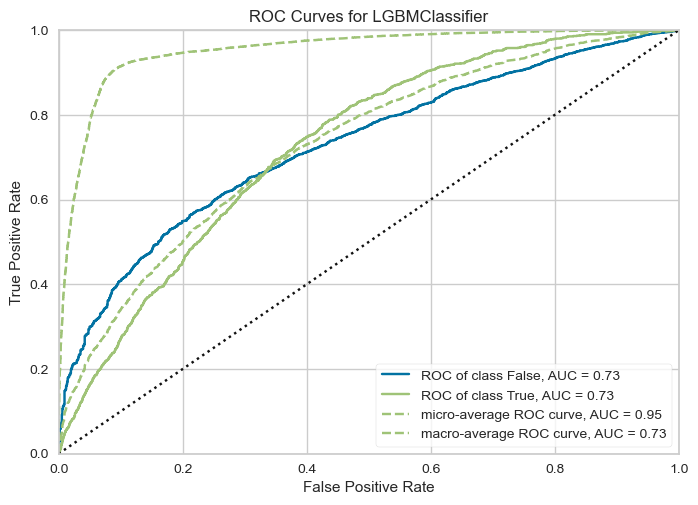

In [98]:
plot_model(tuned_ligh, plot = 'auc')

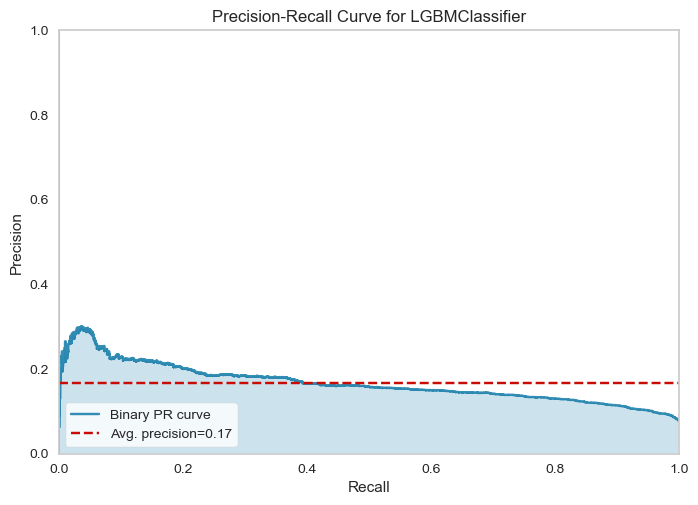

In [99]:
plot_model(tuned_ligh, plot = 'pr')

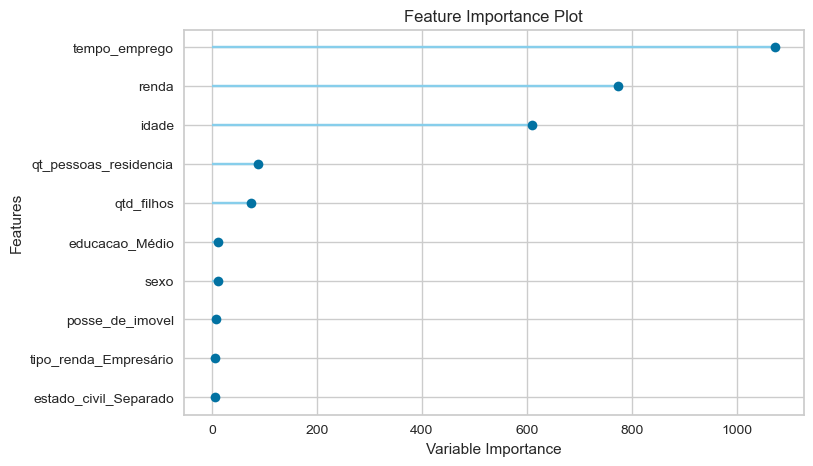

In [101]:
plot_model(tuned_ligh, plot = 'feature')

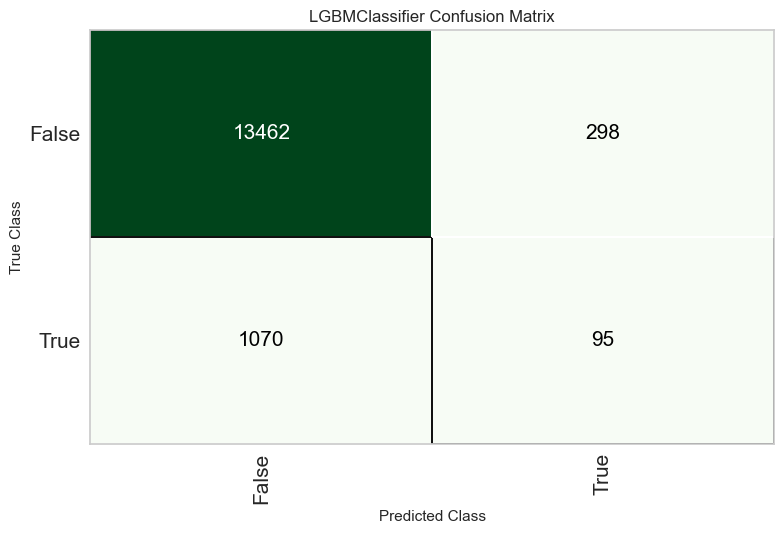

In [103]:
plot_model(tuned_ligh, plot = 'confusion_matrix')

In [107]:
evaluate_model(tuned_ligh)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [104]:
predict_model(tuned_ligh);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9083,0.7289,0.0815,0.2417,0.1220,0.0860,0.1003


In [108]:
final_ligh = finalize_model(tuned_ligh)

In [109]:
print(final_ligh)

Pipeline(memory=Memory(location=C:\Users\WORKST~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categorical_...
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance

In [110]:
predict_model(final_ligh);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9271,0.8874,0.1597,0.6305,0.2548,0.2305,0.2924


In [111]:
save_model(final_ligh, 'Final lightgbm Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\WORKST~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categorical_...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                            